In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

In [2]:
def compute_drawdowns(log_returns):
    # Calculate cumulative returns
    # YOUR CODE HERE
    cumulative_returns = np.exp(log_returns.cumsum())
    # Calculate ongoing drawdown
    # YOUR CODE HERE
    rolling_max = cumulative_returns.cummax()
    drawdowns = (cumulative_returns - rolling_max) / rolling_max
    # Fix: Ensure drawdowns is a 1D Series for plotting
    drawdowns = drawdowns.squeeze()
    return drawdowns

In [ ]:
def plot_returns(log_returns):
    # Create figure and axis objects
    fig, ax = plt.subplots()
    # Calculate cumulative returns
    # YOUR CODE HERE
    cumulative_returns = np.exp(log_returns.cumsum())
    # Calculate ongoing drawdown
    # YOUR CODE HERE
    drawdowns = compute_drawdowns(log_returns)
    # Plotting the cumulative returns
    # YOUR CODE HERE
    ax.plot(cumulative_returns - 1, label='Cumulative Returns')
    ax.fill_between(drawdowns.index, drawdowns, label='Drawdowns', color='red', alpha=0.3)
    # Plotting the drawdowns
    # YOUR CODE HERE
    ax.plot(drawdowns.index, drawdowns, label='Drawdown', color='red')
    # Setting x-axis major locator to each year and formatter
    # YOUR CODE HERE
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    # Setting y-axis ticks every 20%
    # YOUR CODE HERE
    ax.yaxis.set_major_locator(MultipleLocator(0.2))
    # Adding grid with vertical lines for each year
    # YOUR CODE HERE
    ax.grid(which='both', linestyle='--', linewidth=0.5)
    # Rotate x-axis labels by 45 degrees
    # YOUR CODE HERE
    plt.xticks(rotation=45)
    ax.legend()
    ax.set_title('S&P500 Cumulative Returns and Drawdowns')
    ax.set_xlabel('Date')
    ax.set_ylabel('Returns/Drawdown')
    fig.tight_layout()
    plt.show()

In [19]:
# Download S&P 500 front month futures data
sp500_futures_prices = yf.download('ES=F', auto_adjust=False)["Adj Close"]

[*********************100%***********************]  1 of 1 completed


In [20]:
# Calculate logarithmic returns
log_returns = np.log(sp500_futures_prices).diff()

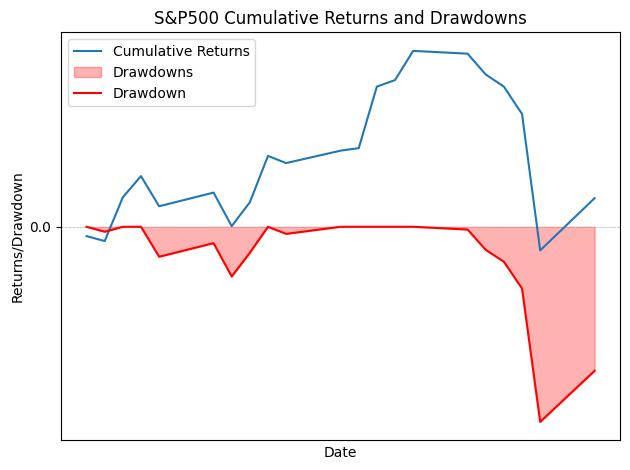

In [21]:
plot_returns(log_returns)